In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')

print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head(10))

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055
5 2018-01-10        3653
6 2018-01-11        3176
7 2018-01-12        3092
8 2018-01-13        3294
9 2018-01-14        3228


Нарисуйте график продаж у `grouped_df`

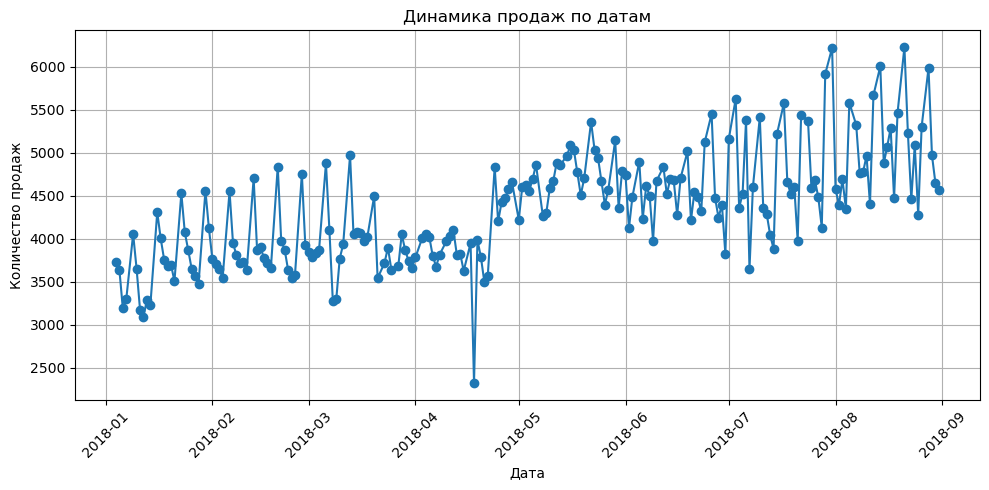

In [10]:
plt.figure(figsize = (10,5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker = 'o', linestyle = '-' )
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Ответ:
    
На графике отображена динамика суммарных продаж по дням в период с января по август 2018 года.
Виден общий восходящий тренд: со временем продажи растут.
В начале года значения колеблются в диапазоне от 3 000 до 4 500, но к августу достигают пиков в 6 000 и выше.
Наблюдаются резкие колебания, но в целом видно сезонное или планомерное увеличение спроса.
Возможные причины — рост компании, расширение ассортимента или сезонные факторы.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [11]:
# Расчёт квартилей и IQR
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Найдём строку с максимальным выбросом
max_outlier = outliers.sort_values(by='Количество', ascending=False).head(1)
print(max_outlier)


             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [12]:
# Фильтрация по: месяцам, дню недели (среда = 2), складу
filtered_df = df[
    (df['Дата'].dt.month.isin([6, 7, 8])) &  # июнь, июль, август
    (df['Дата'].dt.weekday == 2) &           # среда (0=пон, 2=среда)
    (df['Склад'] == 3)                       # склад №3
]

# Группировка по номенклатуре и подсчёт общего количества продаж
top_product = (
    filtered_df
    .groupby('Номенклатура')['Количество']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)
# Переименуем вывод в обычный текст
product_name = top_product.index[0]
total_sales = top_product.values[0]

print(f"Топовый товар: {product_name}, всего продаж: {total_sales}")



Топовый товар: product_1, всего продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

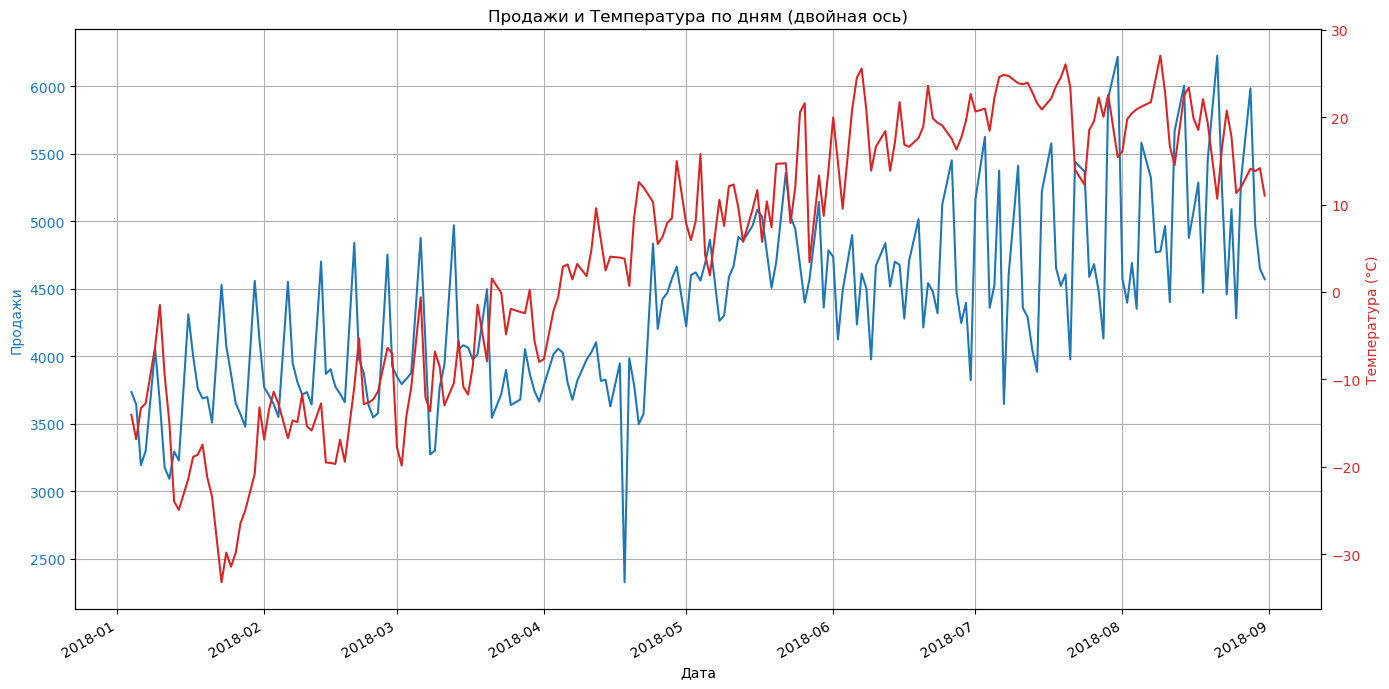

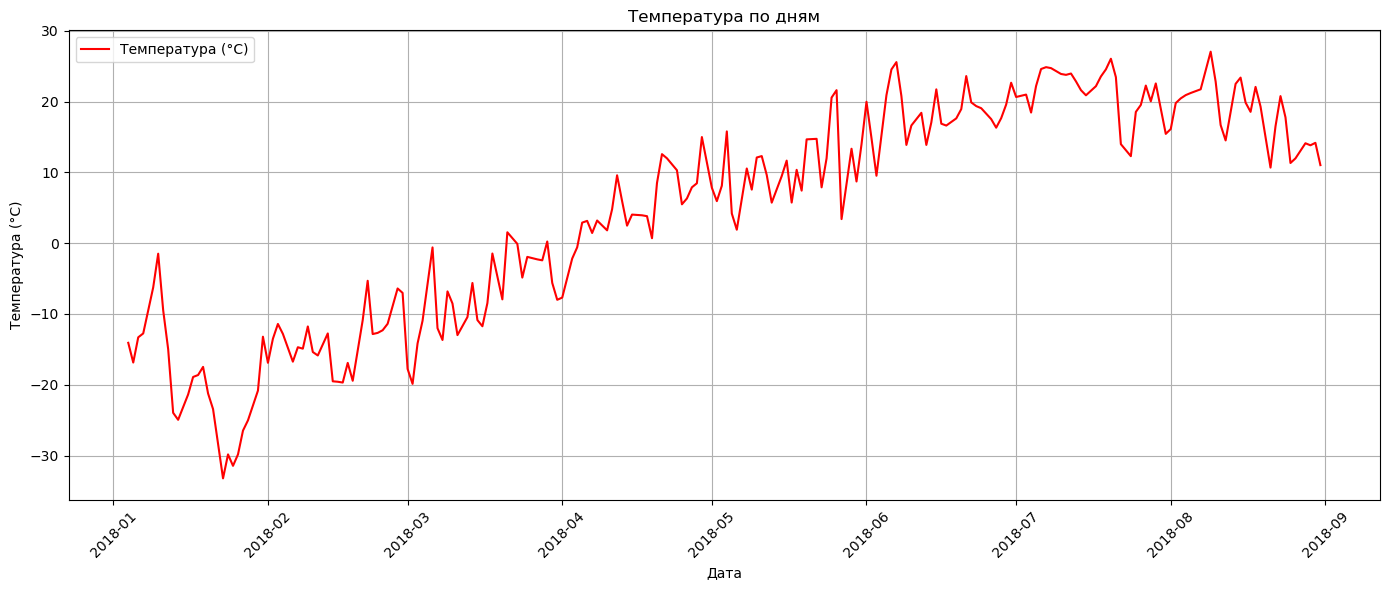

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Чтение данных по продажам

df = pd.read_csv('data.csv')
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')


# 2. Чтение данных по погоде
weather_df = pd.read_excel('погода.xlsx', sheet_name='астана')
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], dayfirst=True)

# Убираем время, оставляем только дату
weather_df['Дата'] = weather_df['Дата'].dt.date

# Считаем среднюю температуру за день
weather_daily = weather_df.groupby('Дата')['T'].mean().reset_index()

# Приводим дату в grouped_df к тому же формату (только дата)
grouped_df['Дата'] = grouped_df['Дата'].dt.date

# 3. Объединяем данные

merged = pd.merge(grouped_df, weather_daily, on='Дата', how='inner')


# 4. Строим график с двумя осями

fig, ax1 = plt.subplots(figsize=(14, 7))

# Первая ось - Продажи
color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Продажи', color=color)
ax1.plot(merged['Дата'], merged['Количество'], label='Продажи', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Вторая ось - Температура
ax2 = ax1.twinx()  # Создаем вторую ось
color = 'tab:red'
ax2.set_ylabel('Температура (°C)', color=color)
ax2.plot(merged['Дата'], merged['T'], label='Температура', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Продажи и Температура по дням (двойная ось)')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


# 5. Отдельно график температуры

plt.figure(figsize=(14, 6))
plt.plot(merged['Дата'], merged['T'], label='Температура (°C)', color='red')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
